In [10]:
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
data = pd.read_csv("sweing.csv")
data.head()

,date,quarter,day,team,smv,over_time_per_worker,incentive,idle_time,wip,no_of_workers,actual_productivity,targeted_productivity
0,2015-01-01,Quarter1,Thursday,8,26.16,2.000000,98,0.0,1108.0,59.0,0.940725,0.8
1,2015-01-01,Quarter1,Thursday,11,11.41,2.000000,50,0.0,968.0,30.5,0.800570,0.8
2,2015-01-01,Quarter1,Thursday,12,11.41,2.000000,50,0.0,968.0,30.5,0.800570,0.8
3,2015-01-01,Quarter1,Thursday,6,25.90,0.571429,50,0.0,1170.0,56.0,0.800382,0.8
4,2015-01-01,Quarter1,Thursday,7,25.90,2.000000,38,0.0,984.0,56.0,0.800125,0.8


In [12]:
data.shape

(691, 12)

In [13]:
# wip = 0 for all hence dropped
data.date = pd.to_datetime(data.date.apply(lambda x: x.strip())) # Converting date to Date-Time format
# data.department = data.department.apply(lambda x: x.rstrip()) # Ignoring trailing white-spaces

# Productivity trends

## General Productivity trend

In [14]:
team_data = data[["date","team","targeted_productivity","actual_productivity"]].groupby("team")

In [15]:
team_data.get_group(3).head()

,date,team,targeted_productivity,actual_productivity
5,2015-01-01,3,0.75,0.753683
13,2015-01-03,3,0.80,0.800323
33,2015-01-04,3,0.75,0.750243
46,2015-01-05,3,0.75,0.750243
52,2015-01-06,3,0.80,0.800274


Correlation for team 1 :  0.7109281318278431
Correlation for team 2 :  0.7241121293077017
Correlation for team 3 :  0.7308079083346801
Correlation for team 4 :  0.7764816801700013
Correlation for team 5 :  0.47448187257380464
Correlation for team 6 :  0.7910493634287745
Correlation for team 7 :  0.5680721812830959
Correlation for team 8 :  0.7145057215050559
Correlation for team 9 :  0.744337453530126
Correlation for team 10 :  0.6669955253655735
Correlation for team 11 :  0.8374567092683697
Correlation for team 12 :  0.971573372801279


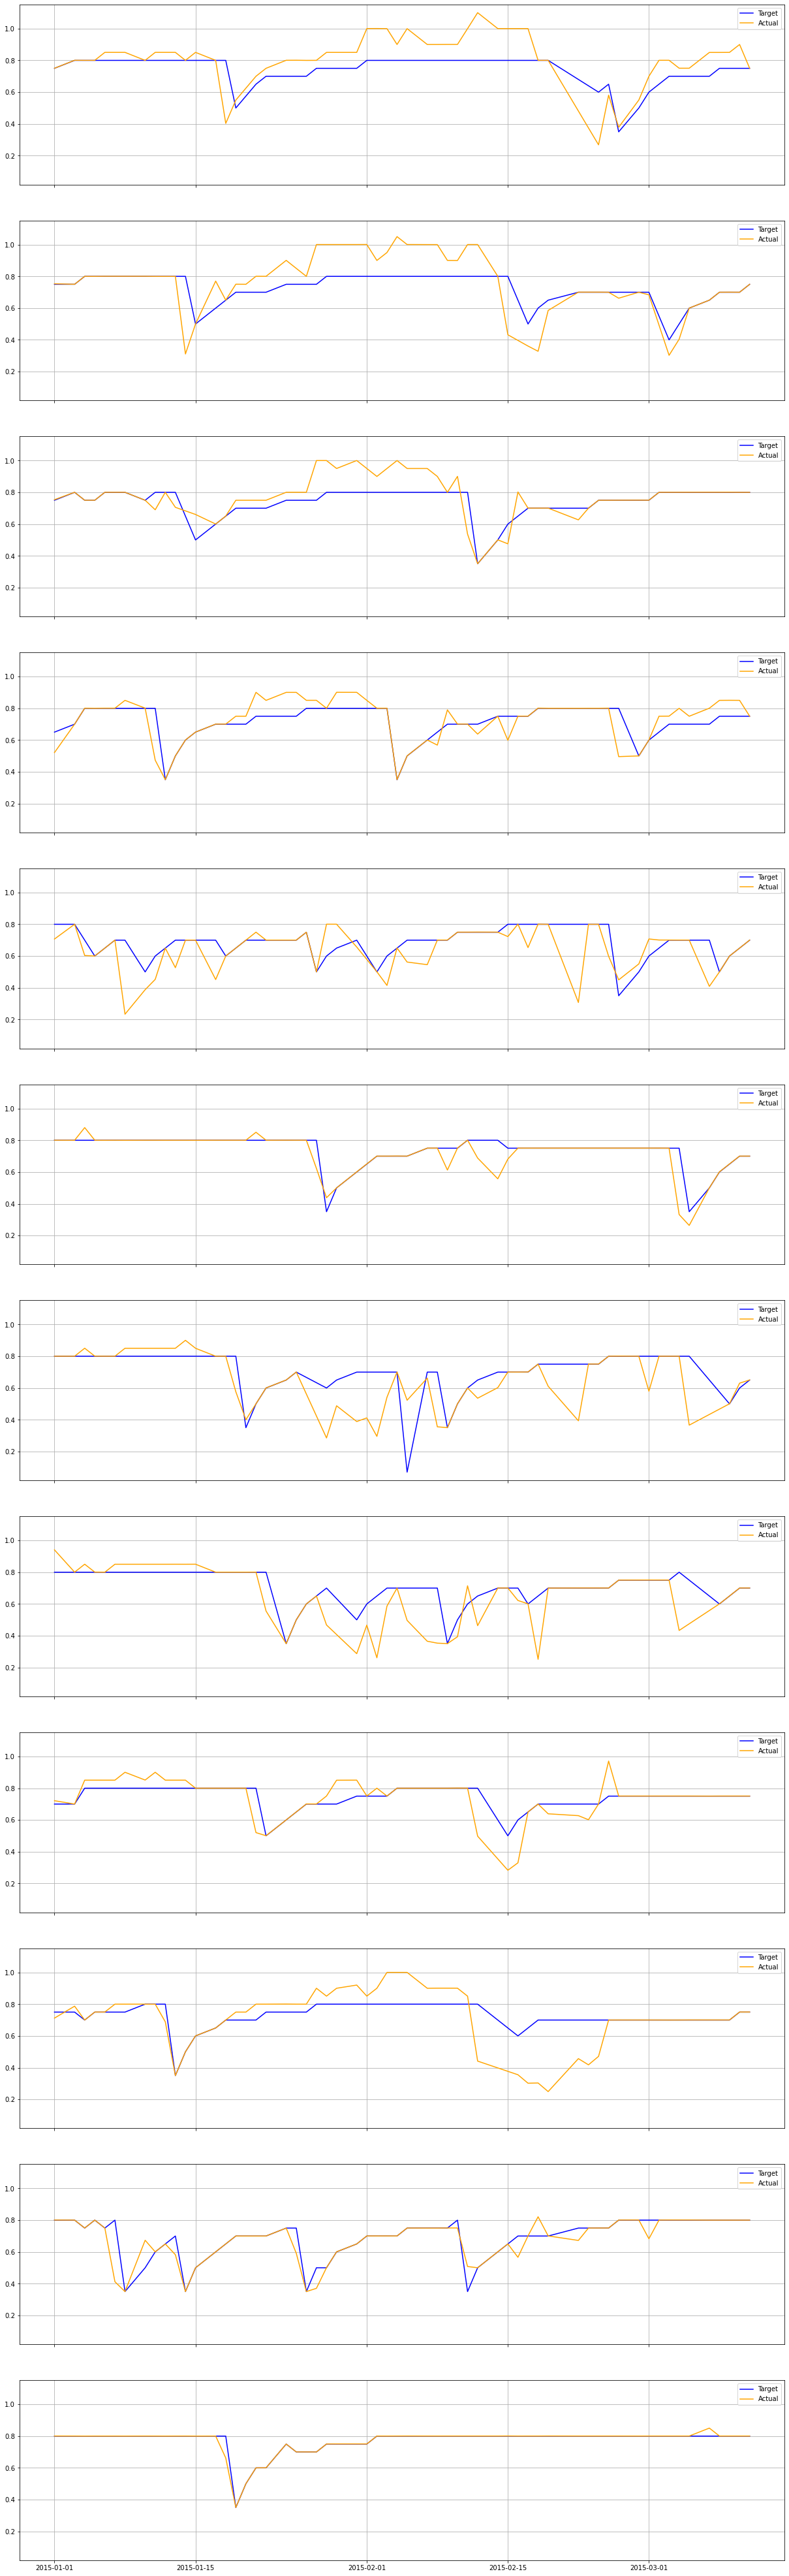

In [16]:
fig, ax = plt.subplots(12,1, sharey=True, sharex=True)
fig.set_size_inches(21, 72,  forward=True)
for team in range(1,13):
    t = team_data.get_group(team)[["date","targeted_productivity","actual_productivity"]]
    t = t.sort_values(by="date")
    t
    ax[team-1].plot_date(t["date"],t["targeted_productivity"], "b")
    ax[team-1].plot_date(t["date"],t["actual_productivity"], "orange")
    ax[team-1].legend(["Target","Actual"])
    ax[team-1].grid(True)
    print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))

## Most Productive Team

In [17]:
df = data[["team","targeted_productivity","actual_productivity"]].copy()
df["diff"] = (df["actual_productivity"] - df["targeted_productivity"])
df["diff^2"] = numpy.square(df["actual_productivity"] - df["targeted_productivity"])
df["gmean"] = 1+(df["actual_productivity"] - df["targeted_productivity"])/df["targeted_productivity"] 

In [18]:
from scipy import stats

def geo_mean(series):
    return stats.gmean(series)

In [19]:
df.groupby("team")["gmean"].agg(geo_mean).sort_values(ascending = False)

team
1     1.079267
3     1.037578
2     1.017255
4     1.011643
12    0.998289
9     0.983863
11    0.981853
6     0.970826
10    0.952815
7     0.932017
5     0.926246
8     0.903228
Name: gmean, dtype: float64

Most Productive are: 1,3,2,4,12

In [20]:
# Incorrect
df.groupby(["team"])["diff"].agg("mean").sort_values(ascending=False)

team
1     0.071400
2     0.034324
3     0.033060
4     0.013628
12   -0.001133
9    -0.001624
10   -0.010234
11   -0.011971
6    -0.016969
5    -0.040410
8    -0.046940
7    -0.047474
Name: diff, dtype: float64

Top performers are: 5,3,4,1,2

In [21]:
df.groupby(["team"])["diff^2"].agg(mean).sort_values()

team
12    0.000365
11    0.005360
6     0.005511
4     0.007395
9     0.007515
3     0.008683
5     0.015986
1     0.017473
8     0.018141
10    0.019626
2     0.019654
7     0.023752
Name: diff^2, dtype: float64

Top 5 most consistent teams are: 12,11,6,4,9?


## Productivity across Quarters

In [22]:
df = data.groupby(["quarter"])["targeted_productivity","actual_productivity"].agg("mean")
df

<ipython-input-22-abc288502adc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby(["quarter"])["targeted_productivity","actual_productivity"].agg("mean")


,targeted_productivity,actual_productivity
quarter,,
Quarter1,0.741801,0.746671
Quarter2,0.727128,0.727200
Quarter3,0.708527,0.685272
Quarter4,0.708929,0.705725
Quarter5,0.713043,0.758615


Correlation: 0.5380508817219335


Text(0, 0.5, 'productivity')

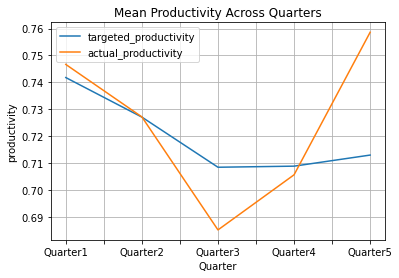

In [23]:
print("Correlation:",df["actual_productivity"].corr(df["targeted_productivity"]))
df.plot(title = "Mean Productivity Across Quarters", grid = True)
xlabel("Quarter")
ylabel("productivity")

# Productivity across Quarters by team

In [24]:
df = data.groupby(["team","quarter"])["targeted_productivity","actual_productivity"].agg("mean")
df.head()

<ipython-input-24-7daa3eb1d7ff>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = data.groupby(["team","quarter"])["targeted_productivity","actual_productivity"].agg("mean")


targeted_productivity  actual_productivity
team quarter                                             
1    Quarter1               0.755556             0.850369
     Quarter2               0.787500             0.884673
     Quarter3               0.755000             0.790530
     Quarter4               0.640000             0.658095
     Quarter5               0.750000             0.850362

Correlation for team 1 :  0.9571316286745973
Correlation for team 2 :  0.9201239458001207
Correlation for team 3 :  0.8395282101074214
Correlation for team 4 :  0.9566216820538205
Correlation for team 5 :  0.4527800593205921
Correlation for team 6 :  0.9892812013745427
Correlation for team 7 :  0.48765190656415075
Correlation for team 8 :  0.9639006968895294
Correlation for team 9 :  0.48417244464114884
Correlation for team 10 :  0.9865599453485363
Correlation for team 11 :  0.9657804783958507
Correlation for team 12 :  0.9960323423508551


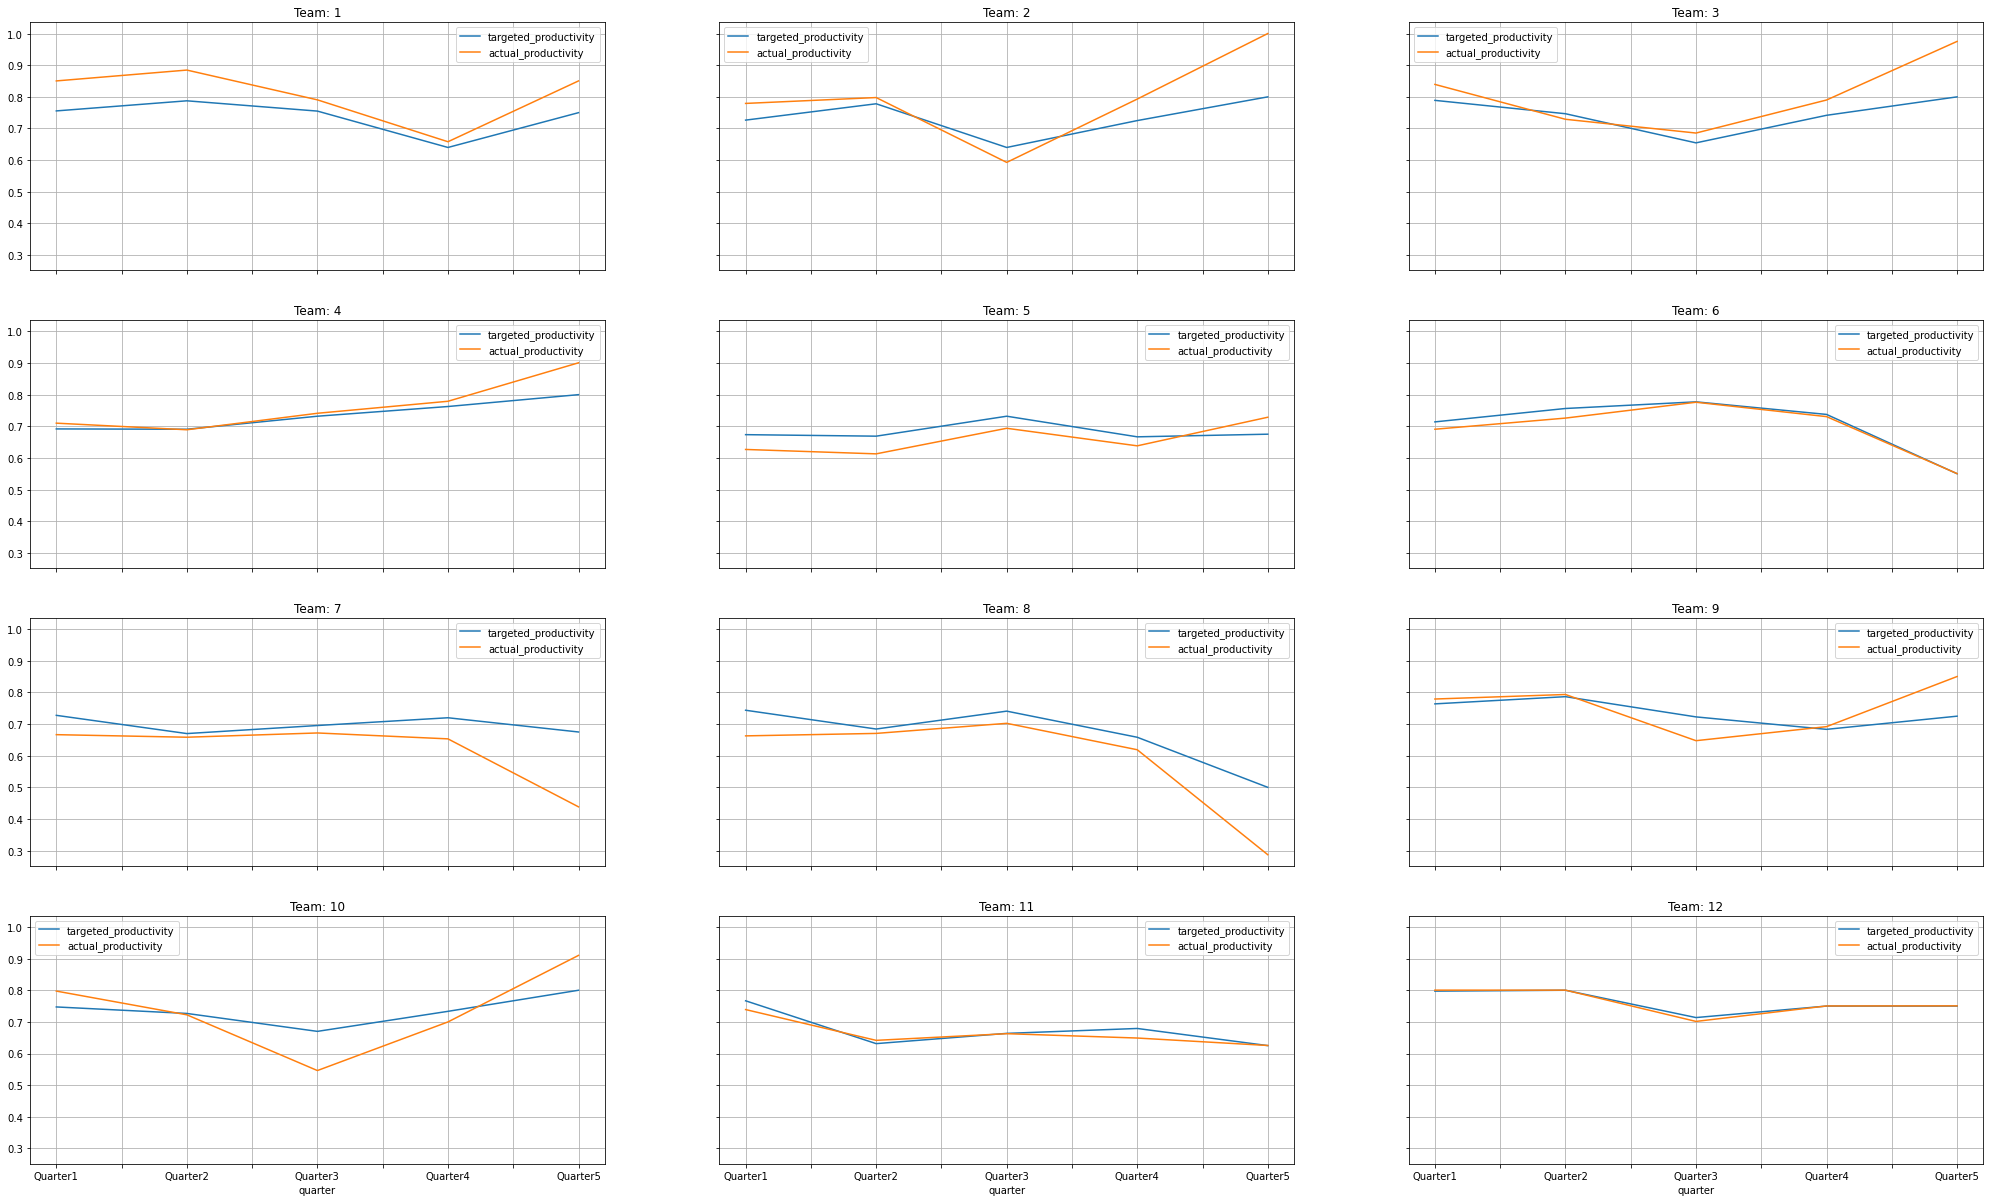

In [25]:
fig, ax = plt.subplots(4,3, sharey=True, sharex=True)
fig.set_size_inches(35, 21, forward=True)
for team in range(1,13):
    t = df.loc[team,:]
    t.plot(ax=ax[((team-1)//3),((team-1)%3)],title='Team: '+(str)(team), grid=True)
    print("Correlation for team",team,": ",t["targeted_productivity"].corr(t["actual_productivity"]))

# Team size v/s Productivity

In [27]:
df = data[["no_of_workers","targeted_productivity","actual_productivity"]].sort_values(by="no_of_workers")
df.head()

,no_of_workers,targeted_productivity,actual_productivity
360,26.0,0.75,0.750400
385,27.0,0.75,0.750028
373,27.0,0.75,0.750028
16,29.5,0.80,0.800237
80,30.5,0.80,0.800025


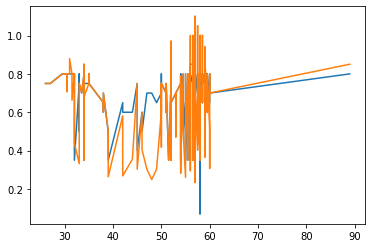

In [28]:
plot(df["no_of_workers"],df["targeted_productivity"])
plot(df["no_of_workers"],df["actual_productivity"])


No clear relationship